In [5]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import spaCy here
import spacy

# Sklearn libraries for machine learning and text processing
from sklearn.model_selection import train_test_split

# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk

# Set up visualization
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('tagsets_json')  # Tagset resource



[nltk_data] Downloading package wordnet to /Users/retr0/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/retr0/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/retr0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/retr0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/retr0/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     /Users/retr0/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


True

1. Data loading and exploration

In [6]:
#Loading the training set
df_train = pd.read_excel('data/AI_vs_huam_train_dataset.xlsx')

#Check shape
print("Dataset shape (rows, columns):", df_train.shape)

#Check Data types
print("\nColumn data types:")
print(df_train.dtypes)

#View Table
print("\nSample rows:")
print(df_train.head())

Dataset shape (rows, columns): (3728, 2)

Column data types:
essay    object
label     int64
dtype: object

Sample rows:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0


In [7]:
#Number of samples and class counts
n_samples = len(df_train)
class_counts = df_train["label"].value_counts()
print(f"Samples: {n_samples}")
print("Class counts:")
print(class_counts)

Samples: 3728
Class counts:
label
0    1864
1    1864
Name: count, dtype: int64


In [8]:
#One exerpt per class
print("\nSample text exerpts:")
for lbl in df_train["label"].unique():
    excerpt = df_train[df_train["label"]==lbl]["essay"].iloc[0][:200].replace('\n',' ')
    print(f" Label {lbl} → {excerpt}")


Sample text exerpts:
 Label 0 → International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Alth
 Label 1 → International sports events demand that countries field their most highly trained athletes, which is why many nations invest in specialized facilities to help their top performers succeed. While this 



== Dataset Shape ==
    Metric  Value
0     Rows   3728
1  Columns      2

== Data Types ==
  Column   Dtype
0  essay  object
1  label   int64

== Class Counts ==
   Class  Count
0      0   1864
1      1   1864


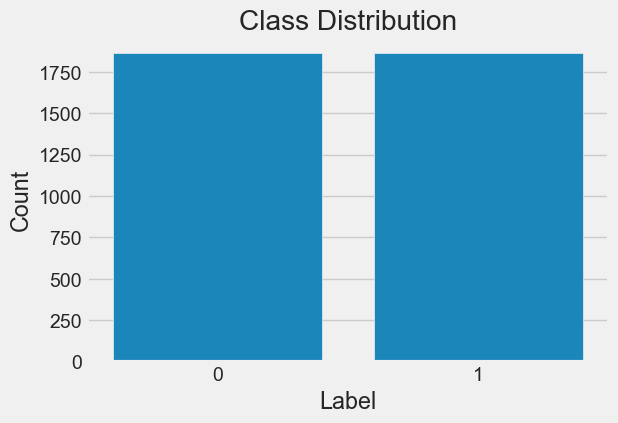

In [9]:
#Dataset Shape table
df_shape = pd.DataFrame({
    "Metric": ["Rows", "Columns"],
    "Value": [df_train.shape[0], df_train.shape[1]]
})
print("\n== Dataset Shape ==")
print(df_shape)

df_dtypes = df_train.dtypes.reset_index()
df_dtypes.columns = ["Column", "Dtype"]
print("\n== Data Types ==")
print(df_dtypes)

class_counts_df = class_counts.reset_index()
class_counts_df.columns = ["Class", "Count"]
print("\n== Class Counts ==")
print(class_counts_df)

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df_train)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

2. Test preprocessing functions

In [10]:
#Stopword Removal
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

def remove_sw(text):
  tokens = text.split()
  kept = [t for t in tokens if t.lower() not in sw]
  return " ".join(kept)

simple = df_train["essay"].iloc[0]
print("Before:", simple[:200])
print("After:", remove_sw(simple)[:300])

Before: International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Alth
After: International sports events require well-trained athletes country, order achieve goal countries make effort build infrastructure designed train top athletes. Although policy indeed make fewer sports facilities ordinary people, investing best athletes vital develop competitive sports performances cou


In [11]:
#Table for Stopword removal sample

sample = df_train["essay"].iloc[0]

sw_df = pd.DataFrame({
    "Stage":   ["Before", "After"],
    "Excerpt": [
        sample[:80].replace("\n"," "),
        remove_sw(sample)[:80].replace("\n"," ")
    ]
})
print("\n== Stop-word Removal Sample ==")
print(sw_df)

vocab_before = set(" ".join(df_train["essay"]).split())
vocab_after  = set(" ".join(df_train["essay"].apply(remove_sw)).split())
print("\nVocab before:", len(vocab_before))
print("Vocab after: ", len(vocab_after))



== Stop-word Removal Sample ==
    Stage                                            Excerpt
0  Before  International sports events require the most w...
1   After  International sports events require well-train...

Vocab before: 42702
Vocab after:  42333


In [12]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

ps = PorterStemmer()
sb = SnowballStemmer("english")
ls = LancasterStemmer()
words = ["running", "ran", "runs", "walking", "lying"]

stems_df = pd.DataFrame({
    "Word":      words,
    "Porter":    [ps.stem(w) for w in words],
    "Snowball":  [sb.stem(w) for w in words],
    "Lancaster": [ls.stem(w) for w in words],
})
print("\n== Stemming Examples ==")
print(stems_df)


== Stemming Examples ==
      Word Porter Snowball Lancaster
0  running    run      run       run
1      ran    ran      ran       ran
2     runs    run      run       run
3  walking   walk     walk      walk
4    lying    lie      lie     lying


In [13]:
from nltk.stem import WordNetLemmatizer

wn  = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

lemmas_df = pd.DataFrame({
    "Word":        words,
    "NLTK Lemma":  [wn.lemmatize(w) for w in words],
    "spaCy Lemma": [nlp(w)[0].lemma_ for w in words],
})
print("\n== Lemmatization Examples ==")
print(lemmas_df)

df_train["processed"] = df_train["essay"].apply(remove_sw)

print("Raw vs. Processed sample:")
print(df_train[["essay", "processed"]].head(1).T)

# X_bow = cv.fit_transform(df_train["processed"])
# X_tfidf = tfidf.fit_transform(df_train["processed"])

def preprocess_text(text):
    no_sw = remove_sw(text)
    tokens = no_sw.split()
    stems  = [ps.stem(t) for t in tokens]
    return " ".join(stems)

df_train["processed"] = df_train["essay"].apply(preprocess_text)


== Lemmatization Examples ==
      Word NLTK Lemma spaCy Lemma
0  running    running         run
1      ran        ran         run
2     runs        run         run
3  walking    walking        walk
4    lying      lying         lie
Raw vs. Processed sample:
                                                           0
essay      International sports events require the most w...
processed  International sports events require well-train...


In [14]:
#define X and Y
X = df_train["processed"]
y = df_train["label"]


In [15]:
#split train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

3. Feature Extraction

In [16]:
#using pandas here
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(token_pattern=r"\b\w+\b",
     ngram_range=(1,2),
     max_features=5000,
     min_df=5,
     max_df=0.8)

X_bow = cv.fit_transform(df_train["processed"])
X_train_data = cv.fit_transform(X_train) #vectorized data
X_val_data = cv.transform(X_val)

In [17]:
print("BoW matrix shape (docs × features):", X_bow.shape)
bow_shape_df = pd.DataFrame({
    "Metric":  ["Documents", "Features"],
    "Value":   [X_bow.shape[0], X_bow.shape[1]]
})
print("\n== BoW Shape ==")
print(bow_shape_df)

BoW matrix shape (docs × features): (3728, 5000)

== BoW Shape ==
      Metric  Value
0  Documents   3728
1   Features   5000


In [18]:
feat10 = cv.get_feature_names_out()[:10]
feat_df = pd.DataFrame({"First 10 Features": feat10})
print("\n== Sample BoW Features ==")
print(feat_df)


== Sample BoW Features ==
  First 10 Features
0               000
1                 1
2                10
3               100
4                19
5                 2
6                20
7                 3
8                30
9                 4


In [19]:
tfidf = TfidfVectorizer(
    token_pattern=r"\b\w+\b",
    ngram_range=(1,3),    # unigrams + bigrams + trigrams
    max_features=5000,
    min_df=5,
    max_df=0.8
)

X_tfidf = tfidf.fit_transform(df_train["processed"] if "processed" in df_train else df_train["essay"])

#Matrix shape
print("\nTF-IDF matrix shape (docs × features):", X_tfidf.shape)
tfidf_shape_df = pd.DataFrame({
    "Metric":  ["Documents", "Features"],
    "Value":   [X_tfidf.shape[0], X_tfidf.shape[1]]
})
print("\n== TF-IDF Shape ==")
print(tfidf_shape_df)

#Sample feature names
tf10 = tfidf.get_feature_names_out()[:10]
tfidf_feat_df = pd.DataFrame({"First 10 TF-IDF Features": tf10})
print("\n== Sample TF-IDF Features ==")
print(tfidf_feat_df)


TF-IDF matrix shape (docs × features): (3728, 5000)

== TF-IDF Shape ==
      Metric  Value
0  Documents   3728
1   Features   5000

== Sample TF-IDF Features ==
  First 10 TF-IDF Features
0                      000
1                        1
2                       10
3                      100
4                       19
5                        2
6                       20
7                        3
8                       30
9                        4


4. Model training and hyperparameter tuning

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#rbf goes to its own function
params = {"kernel": ["linear", "rbf"], "C":[0.1,1,10]}
svc = GridSearchCV(SVC(), params, cv=5, scoring="f1_macro")
svc.fit(X_tfidf, df_train["label"])
print("Best SVM:", svc.best_params_)

Best SVM: {'C': 1, 'kernel': 'linear'}


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":            ["gini", "entropy"],
    "max_depth":            [None, 10, 20],
    "min_samples_split":    [2, 5],
    "min_samples_leaf":     [1, 2],       # ← corrected
}

dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    scoring="f1_macro",
    verbose=3,
)
dt.fit(X_bow, df_train["label"])
print("Best DT:", dt.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.834 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.881 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.969 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.957 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.949 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.835 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.889 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.965 total time=  

5. Evaluation and Visualization

SVM               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1864
           1       1.00      1.00      1.00      1864

    accuracy                           1.00      3728
   macro avg       1.00      1.00      1.00      3728
weighted avg       1.00      1.00      1.00      3728



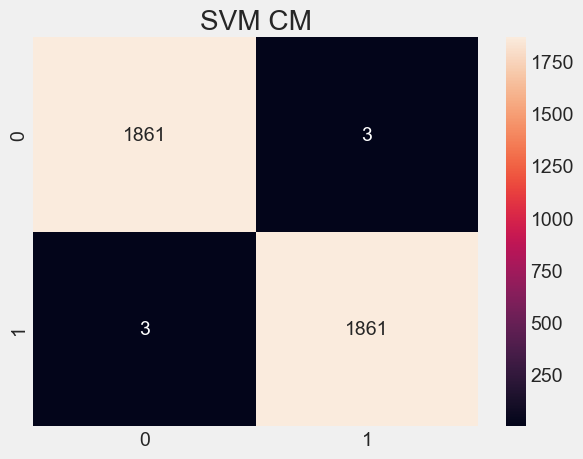

DT               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1864
           1       0.98      0.98      0.98      1864

    accuracy                           0.98      3728
   macro avg       0.98      0.98      0.98      3728
weighted avg       0.98      0.98      0.98      3728



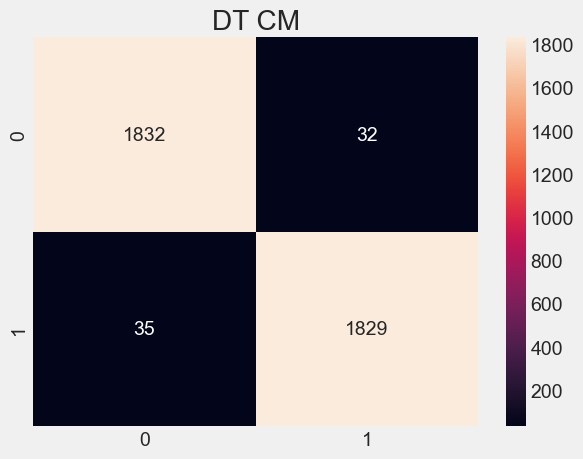

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model, x in [("SVM", svc, X_tfidf), ("DT", dt, X_bow)]:
  y_pred = model.predict(x)
  print(name, classification_report(df_train["label"], y_pred))
  cm = confusion_matrix(df_train["label"], y_pred)
  sns.heatmap(cm, annot=True, fmt="d"); plt.title(f"{name} CM"); plt.show()

In [29]:
errors = df_train[(y_pred != df_train["label"])]
errors[["essay","label"]].head(5)

,essay,label
3,"It is commonly believed, that companies should...",0
12,It indeed appears true that the frequency with...,0
44,News reports in the media focus on problems an...,0
48,The responsibility for providing funds for ret...,0
68,History of human's life enriches us with pivot...,0


Testing

In [41]:
df_test = pd.read_csv("data/Final_test_data.csv")

In [45]:
X_test = tfidf.transform(df_test["essay"])
df_test["predicted_label"] = svc.predict(X_test)
df_test[["essay", "predicted_label"]].to_csv("Turd-Ferguson.csv", index=False)

if df_test["predicted_label"][0] == 0:
    print("This is most likely written by a human")
else:
    print("This is most likely AI-Generated")

This is most likely written by a human
